## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Daniel Lee

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

***The code below shows the distribution of the different variables we worked with for our analysis by showing visualizations and describing the relevant distribution information (.describe)***

In [2]:
# downloading the dataset 
df = pd.read_csv('complete_dataset.csv')
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# df = df[df['date'].apply(lambda x: x.year)==2019].reset_index(drop=True)

Text(0.5, 0, 'Demand')

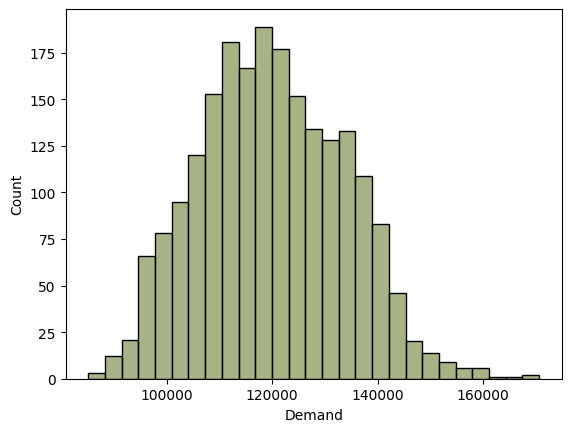

In [3]:
# distribution of demand data
sns.histplot(data=df['demand'], color='#8A9A5B')
plt.xlabel('Demand')

Text(0, 0.5, 'Demand')

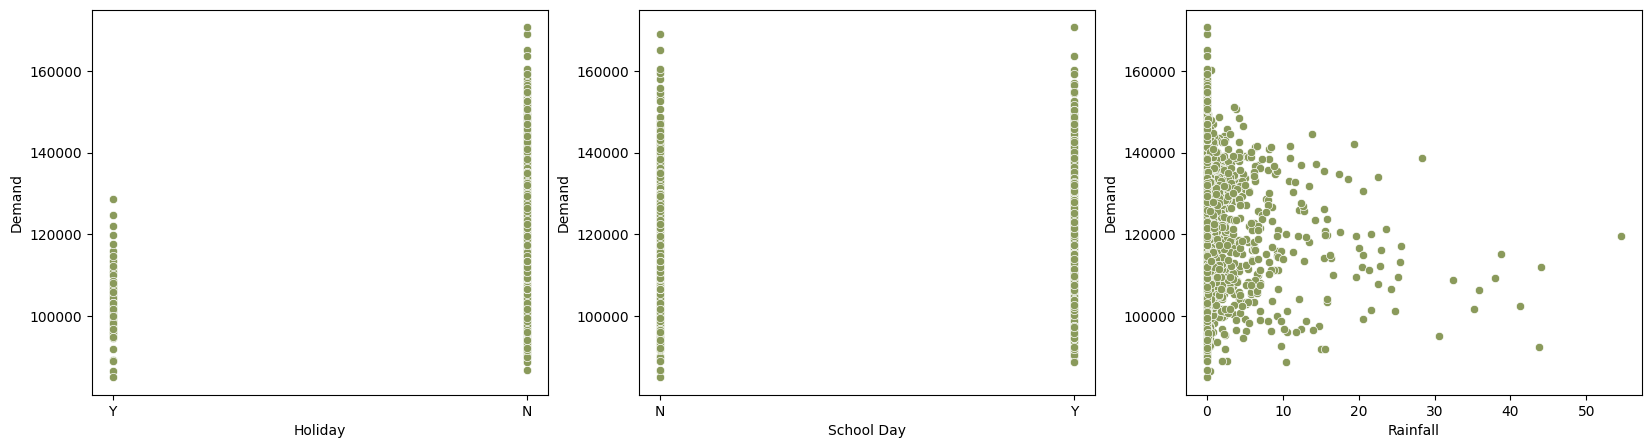

In [4]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='holiday', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Holiday')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='school_day', y='demand', data=df, color='#8A9A5B')
plt.xlabel('School Day')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='rainfall', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Rainfall')
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

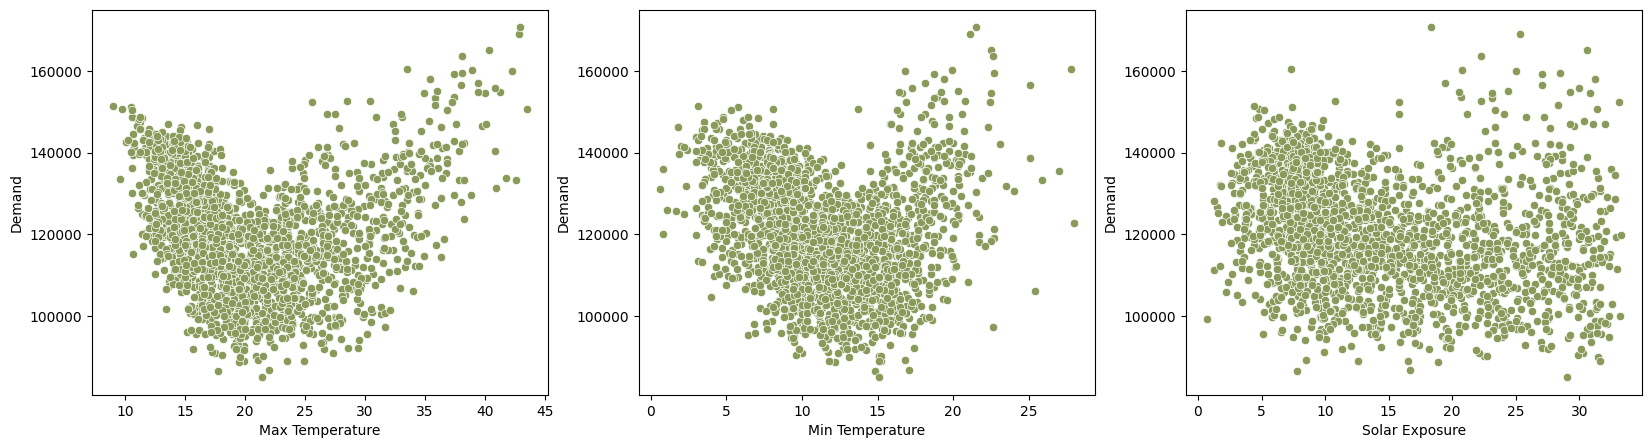

In [5]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='max_temperature', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Max Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='min_temperature', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Min Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='solar_exposure', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Solar Exposure')
plt.ylabel('Demand')

In [6]:
print(df['max_temperature'].isnull().sum())
print(df['solar_exposure'].isnull().sum())

0
1


In [7]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


### Data cleaning and Data Preparation
*By Lauren Lin*

From the data quality check we realized that:

1. There were 4 NA values in this dataset, 1 for solar_exposure and 3 for rainfall, so we imputed them with the means of their respective variables. For example, since the mean of df['solar_exposure'] is 14.74337292161519, we replaced the NA value of solar_exposure with 14.74337292161519.
2. n addition to imputing NA values, we changed the values of'school_day' and 'holiday' ('N' and 'Y') to a binary of 0 and 1 so that they could be added to our regression model.

The code below implements the above cleaning.

In [8]:
# Changing values to more easily fit by changing to 1s and 0s instead of Y or N
df['school_day'] = df['school_day'].apply(lambda x: 1 if x == 'Y' else 0)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x == 'Y' else 0)

In [9]:
# 4 NAN values that were imputed
print(df['solar_exposure'].mean())
df.at[1060, 'solar_exposure']=14.74337292161519

print(df['rainfall'].mean())
df.at[161, 'rainfall']=1.505943889681408
df.at[1377, 'rainfall']=1.505943889681408
df.at[1378, 'rainfall']=1.505943889681408

14.743372921615203
1.5059438896814075


## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

*By Lauren Lin*


In [ ]:
# Make pairplot of the dataframe to explore relationships between variables
sns.pairplot(df, plot_kws={'color':'#8A9A5B'}, diag_kws={'color':'#8A9A5B'})

- ***There is an obvious quadratic relationship between demand and min_temperature and demand and max_temperature***
- ***It seems that solar_exposure might also have a quadratic relationship with demand, but a residual plot should be graphed to confirm***
- ***Whether rainfall, school_day, and/or holiday have an effect on demand is unclear. They should be included in the first model so that we can check their p-values.***

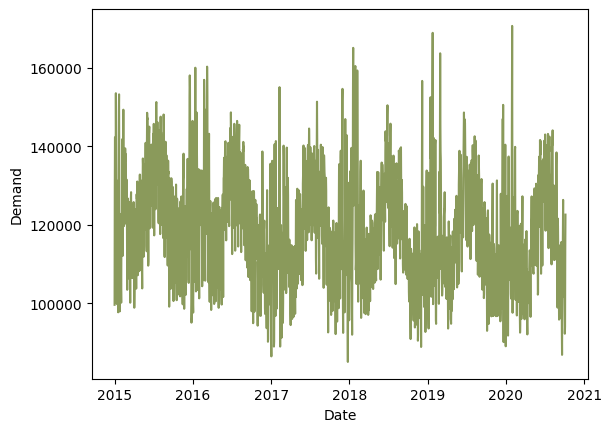

In [14]:
# Looking at relationship between date and demand
sns.lineplot(x='date', y='demand', data=df, color = '#8A9A5B')
plt.xlabel('Date')
plt.ylabel('Demand')

- ***The repeating patterns in the lineplot of demand against date indicate autocorrelation.***

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF

X = df[['max_temperature', 'min_temperature', 'solar_exposure', 'holiday', 'rainfall']]
X = add_constant(X, has_constant='add')
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

for i in range(len(X.columns)):
    X.columns[i]
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

           feature        VIF
0            const  12.478907
1  max_temperature   2.768200
2  min_temperature   2.056258
3   solar_exposure   1.571803
4          holiday   1.005603
5         rainfall   1.050010


- ***All of the values of VIF are close to 1, so we do not need to be concerned about multicollinearity in our model.***

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

*By Jonny Myung and Jamie Park*


In [16]:
# model 1 : multiple linear regression with max temp, min temp, solar exposure, school_day, and holiday
ols_object = smf.ols(formula = 'demand~max_temperature+min_temperature+solar_exposure+school_day+holiday+rainfall', data = df)
model1 = ols_object.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     69.55
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.46e-79
Time:                        18:49:18   Log-Likelihood:                -22864.
No. Observations:                2106   AIC:                         4.574e+04
Df Residuals:                    2099   BIC:                         4.578e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.235e+05   1094.925    1

Text(0, 0.5, 'Residuals')

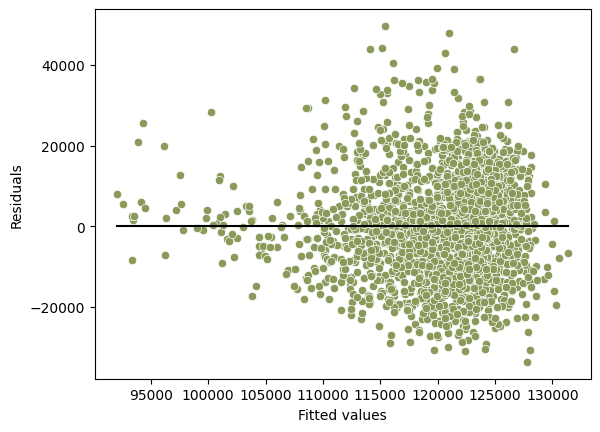

In [17]:
# Plotting residuals against fitted values
sns.scatterplot(x=model1.fittedvalues, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[model1.fittedvalues.min(), model1.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

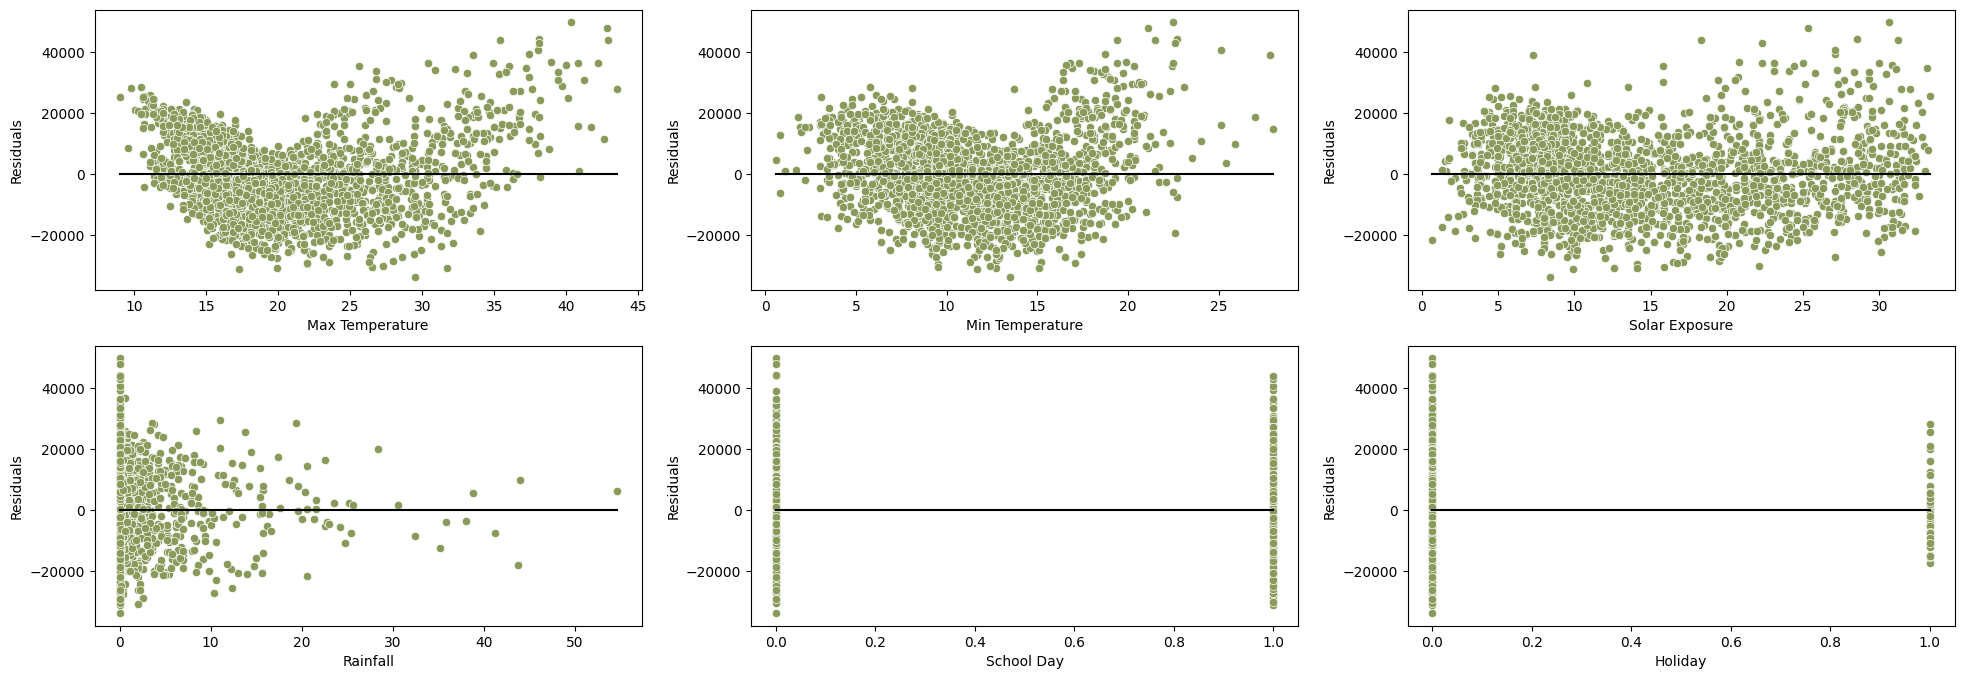

In [18]:
# Visualizing residuals against all the independent variables
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=df.max_temperature, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.min_temperature, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.solar_exposure, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='black')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.rainfall, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='black')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.school_day, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.school_day.min(), df.school_day.max()], y=[0,0], color='black')
plt.xlabel('School Day')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='black')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### This first model 1 allowed us to realized the following:
- The model was y heteroscedastic
- Both our max temperature and min temperature variables were quadratic
- So was the solar exposure variable (quadratic)

### Code fitting the final model

*By Jonny Myung and Jamie Park*


Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [19]:
# model2 : np.log(y) to resovle heterscedasticity
ols_object = smf.ols(formula = 'np.log(demand)~max_temperature+I(max_temperature**2)+min_temperature+I(min_temperature**2)+solar_exposure+I(solar_exposure**2)+school_day+holiday+rainfall', data = df)
model2 = ols_object.fit()
print(model2.summary())

pred_demand = model2.predict(df)
print(np.sqrt((df['demand']-pred_demand)**2).mean())

                            OLS Regression Results                            
Dep. Variable:         np.log(demand)   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          1.33e-297
Time:                        18:49:19   Log-Likelihood:                 2275.3
No. Observations:                2106   AIC:                            -4531.
Df Residuals:                    2096   BIC:                            -4474.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Text(0, 0.5, 'Residuals')

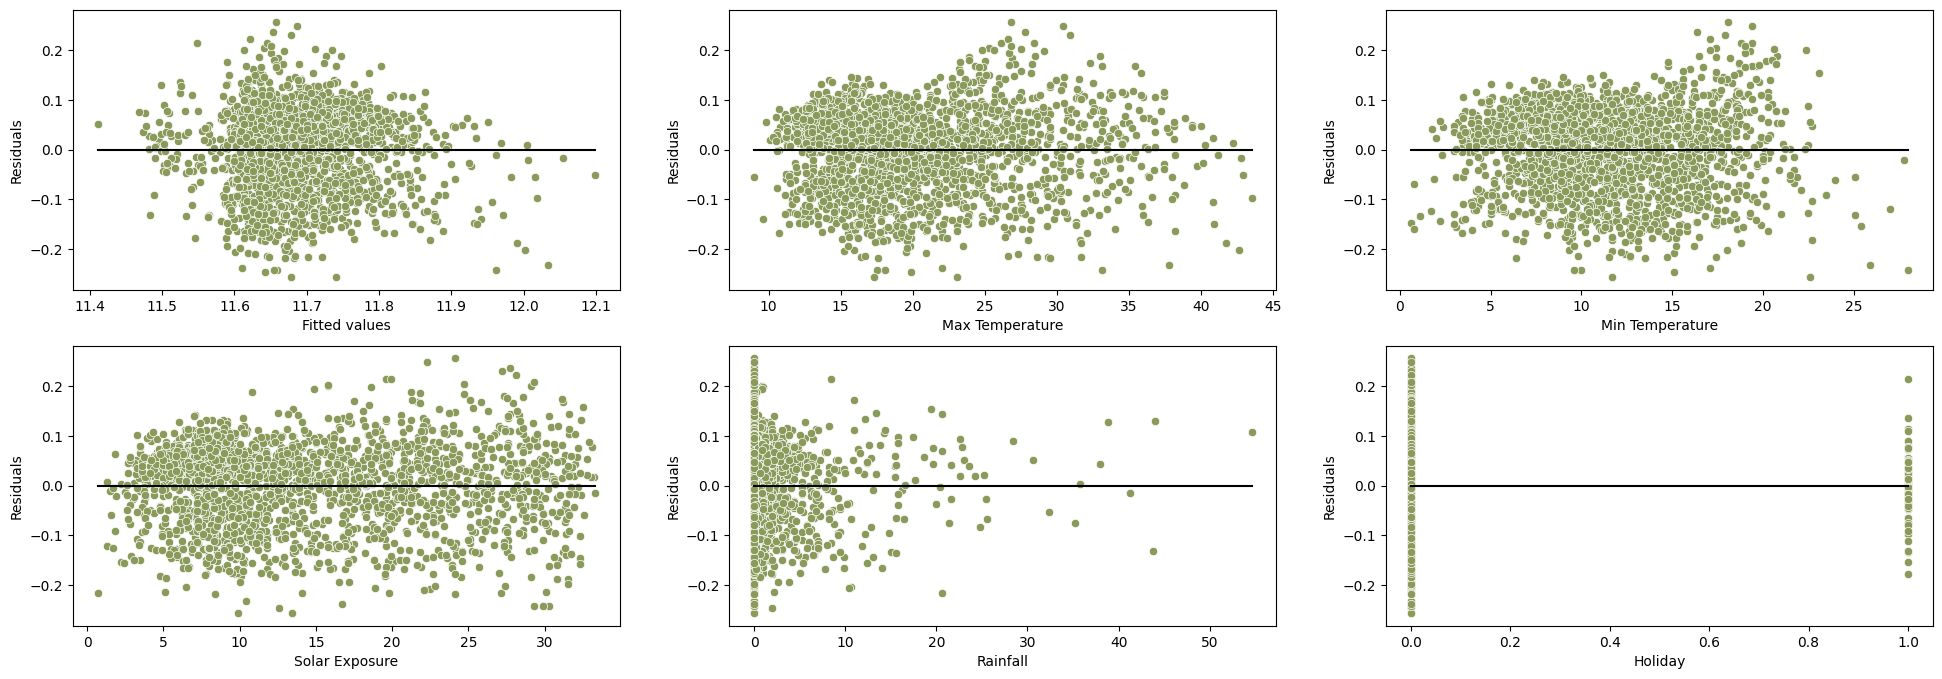

In [20]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[model2.fittedvalues.min(), model2.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.max_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.min_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.solar_exposure, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='black')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.rainfall, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='black')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='black')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### Model 2 conclusions: 
- Our R-squared significantly better
- The residual plots indicate that linear assumptions have been satisfied

### Autocorrelation Section

*By Jamie Park*


Besides all of the code above, we also conducted autocorrelation to see if adding lag better furthered our results

Text(0, 0.5, 'Demand')

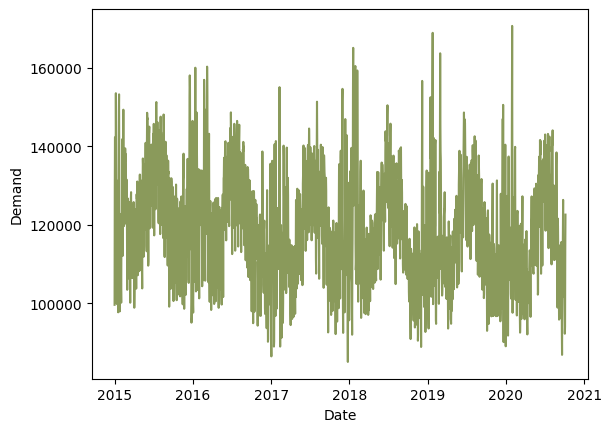

In [21]:
sns.lineplot(x='date', y='demand', data=df, color = '#8A9A5B')
plt.xlabel('Date')
plt.ylabel('Demand')

In [22]:
df['demand'] = np.log(df['demand'])
df['max_temperature_squared'] = (df['max_temperature'])**2
df['min_temperature_squared'] = (df['min_temperature'])**2
df['solar_exposure_squared'] = (df['solar_exposure'])**2

In [23]:
# imputing null values with 0

In [24]:
df[df['solar_exposure'].isna()]

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,max_temperature_squared,min_temperature_squared,solar_exposure_squared


In [25]:
df.at[1060, 'solar_exposure']=0

In [26]:
df[df['rainfall'].isna()]

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,max_temperature_squared,min_temperature_squared,solar_exposure_squared


In [27]:
df.at[161, 'rainfall']=0
df.at[1377, 'rainfall']=0
df.at[1378, 'rainfall']=0

df.columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'max_temperature_squared', 'min_temperature_squared',
       'solar_exposure_squared'],
      dtype='object')

In [28]:
df = df.drop(['RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'], axis=1)

In [29]:
df.at[1060, 'solar_exposure_squared']=0

base_vars = ['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'solar_exposure_squared', 'holiday', 'rainfall']

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df[base_vars]
X = add_constant(X, has_constant='add')
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

for i in range(len(X.columns)):
    X.columns[i]
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                   feature         VIF
0                    const  130.530435
1          max_temperature   52.079102
2  max_temperature_squared   45.099397
3          min_temperature   23.791565
4  min_temperature_squared   22.604641
5           solar_exposure   24.464073
6   solar_exposure_squared   23.249408
7                  holiday    1.013046
8                 rainfall    1.056724


### vif conclusions:
- max_temperature, max_temperature_squared, min_temperature, and min_temperature_squared have high vif — makes sense since _temperature_squared was dervied from _temperature

Text(0, 0.5, 'Studentized Residuals')

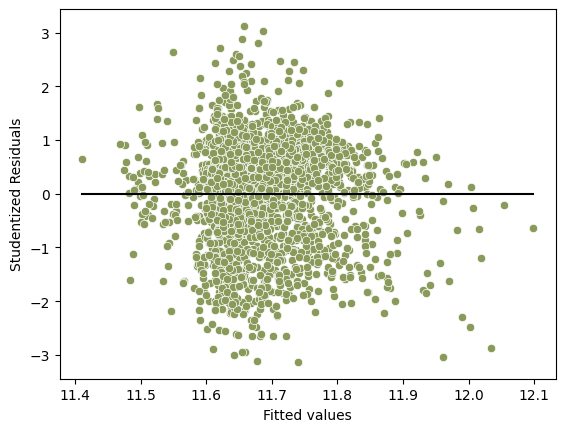

In [31]:
out = model2.outlier_test()

sns.scatterplot(x = (model2.fittedvalues), y=(out.student_resid), color = '#8A9A5B')
sns.lineplot(x = [model2.fittedvalues.min(), model2.fittedvalues.max()], y = [0,0], color = 'black')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

In [32]:
np.sum((np.abs(out.student_resid)>3))

6

In [33]:
#Computing the leverage statistic for each observation
influence = model2.get_influence()
leverage = influence.hat_matrix_diag

In [34]:
out = model2.outlier_test()

In [35]:
average_leverage = (model2.df_model+1)/model2.nobs
high_leverage_threshold = 4*average_leverage
np.sum(leverage>high_leverage_threshold)

41

In [36]:
#Dropping influential points from data
df_filtered = df.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [37]:
df.shape[0]-df_filtered.shape[0]

1

In [38]:
ols_object = smf.ols(formula = 'np.log(demand)~max_temperature+I(max_temperature**2)+min_temperature+I(min_temperature**2)+solar_exposure+I(solar_exposure**2)+school_day+holiday+rainfall', data = df_filtered)
model3 = ols_object.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(demand)   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          4.13e-297
Time:                        18:49:25   Log-Likelihood:                 7447.3
No. Observations:                2105   AIC:                        -1.487e+04
Df Residuals:                    2095   BIC:                        -1.482e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5199      0.002   1425.202      0.000       2.516       2.523
max_temperature            -0.0039      0.000    -22.011      0.000      -0.004      -0.004
I(max_temperature ** 2)  8.458e-05   3.48e-06     24.337      0.000    7.78e-05    9.14e-05
min_temperature            -0.0026      0.000    -14.599      0.000      -0.003      -0.002
I(min_temperature ** 2)     0.0001   6.91e-06     14.785      0.000    8.86e-05       0.000
solar_exposure             -0.0009   9.58e-05     -9.061      0.000      -0.001      -0.001
I(solar_exposure ** 2)   1.922e-05   2.69e-06      7.148      0.000    1.39e-05    2.45e-05
school_day                  0.0025      0.000      7.330      0.000       0.002       0.003
holiday                    -0.0098      0.001    -11.739      0.000      -0.011      -0.008
rainfall                   -0.0002   3.67e-05     -5.007      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       51.107   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.016
Skew:                          -0.385   Prob(JB):                     1.86e-12
Kurtosis:                       2.844   Cond. No.                     7.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# functions for autocorrelation
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation

def build_model(features):
    X=sm.add_constant(df_filtered[df_filtered['date']<date][features])
    y=df_filtered[df_filtered['date']<date]['demand']
    model = sm.OLS(y, X, missing='drop').fit()
    predictions = model.predict(X)
    res = y-predictions
    return model, res

def plt_residual(res):
    plt.plot(range(len(res)), res, color = '#8A9A5B') 
    plt.ylabel('Residual')
    plt.xlabel('Day')

def plt_residual_lag(res, nlag):
    x=res.values
    y=res.shift(nlag).values
    sns.kdeplot(x,y=y,color='blue',shade=True )
    plt.xlabel('res')
    plt.ylabel("res-lag-{}".format(nlag))
    rho,p=corrcoef(x,y)
    plt.title("n_lag={} hours, correlation={:f}".format(nlag, rho))
    
def plt_acf(res):
    plt.rcParams['figure.figsize'] = [18, 5]
    acorr = sm.tsa.acf(res.dropna(), nlags = len(res.dropna())-1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(acorr)
    ax1.set_ylabel('corr')
    ax1.set_xlabel('n_lag')
    ax1.set_title('Auto Correlation')
    ax2.plot(acorr[:4*7])
    ax2.set_ylabel('corr')
    ax2.set_xlabel('n_lag')
    ax2.set_title('Auto Correlation (4-week zoomed in) ')
    plt.show()
    pd.set_option('display.max_columns', None)
    adf=pd.DataFrame(np.round(acorr[:30], 2).reshape([30, 1] ))
    adf.index.name='day'
    display(adf)
    plt.rcParams['figure.figsize'] = [9, 5]

def corrcoef(x,y):
    a,b=ma.masked_invalid(x),ma.masked_invalid(y)
    msk = (~a.mask & ~b.mask)
    return pearsonr(x[msk],y[msk])[0], normaltest(res, nan_policy='omit')[1]

/var/folders/mb/ktwx7gl57vl659jcbpnslcgh0000gn/T/ipykernel_32845/2638954213.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, normaltest
/var/folders/mb/ktwx7gl57vl659jcbpnslcgh0000gn/T/ipykernel_32845/2638954213.py:3: DeprecationWarning: Please use `normaltest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, normaltest


In [40]:
from datetime import date, timedelta

sdate = date(2019,1,1)
edate = date(2020,1,1)
all_dates = pd.date_range(sdate, edate-timedelta(days=1), freq='d')

In [41]:
def get_rmse(lags):
    predictions = pd.DataFrame()
    sse = 0
    for date in all_dates:
        model, residuals = build_model(base_vars+lags)
        subset = df_filtered[df_filtered['date'] == date]
        temp = model.predict(sm.add_constant(subset[base_vars+lags], has_constant='add'))
        sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
        predictions = pd.concat([predictions, temp]) 
        
    model, residuals = build_model(base_vars+lags)
    print(model.summary())
    plt_residual(residuals)  
    
    return np.sqrt(sse/365), predictions

In [42]:
all_dates[0] < df['date'][0]

False

In [43]:
lags = []
days = []
rmses = []
for num in np.arange(1, 7, 1):
    var_name = 'demand_lag_' + str(num) + '_day'
    df_filtered[var_name] = df_filtered['demand'].shift(num)
    
    days.append(num)
    rmses.append(get_rmse([var_name]))
    
lag_models = pd.DataFrame({'day_lag':days , 'rmse':rmses})
lag_models

TypeError: Invalid comparison between dtype=datetime64[ns] and type

In [ ]:
lags = []
days = []
rmses = []
for num in np.arange(7, 29, 7):
    var_name = 'demand_lag_' + str(num) + '_day'
    lags.append(var_name)
    df_filtered[var_name] = df_filtered['demand'].shift(num)
    
    days.append(num)
    rmses.append(get_rmse([var_name]))
    
lag_models = pd.DataFrame({'day_lag':days , 'rmse':rmses})
lag_models

In [ ]:
lags = []
days = []
rmses = []
for num in [1, 7, 14]:
    var_name = 'demand_lag_' + str(num) + '_day'
    lags.append(var_name)
    df_filtered[var_name] = df_filtered['demand'].shift(num)
    
model, residuals = build_model(base_vars+lags)
rmse, predictions = get_rmse(lags)
print(rmse)
plt_residual(residuals)

sns.scatterplot(x=df_filtered['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df_filtered['demand']), max(df_filtered['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [ ]:
lags = []
days = []
rmses = []
for num in [1, 14]:
    var_name = 'demand_lag_' + str(num) + '_day'
    lags.append(var_name)
    df_filtered[var_name] = df_filtered['demand'].shift(num)
    
model, residuals = build_model(base_vars+lags)
rmse, predictions = get_rmse(lags)
print(model.summary())
print(rmse)
plt_residual(residuals)

sns.scatterplot(x=df_filtered['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df_filtered['demand']), max(df_filtered['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [ ]:
predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars)
    subset = df_filtered[df_filtered['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

In [ ]:
model, residuals = build_model(base_vars)
print(model.summary())
plt_residual(residuals)  

In [ ]:
sns.scatterplot(x=df_filtered['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df_filtered['demand']), max(df_filtered['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [ ]:
np.sqrt(sse/365)

In [ ]:
df_filtered['demand_lag_1_day']=df_filtered['demand'].shift(1)

predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars+['demand_lag_1_day'])
    subset = df_filtered[df_filtered['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars+['demand_lag_1_day']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

In [ ]:
model, residuals = build_model(base_vars+['demand_lag_1_day'])
print(model.summary())
plt_residual(residuals)

In [ ]:
sns.scatterplot(x=df_filtered['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df_filtered['demand']), max(df_filtered['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand (Log)')
plt.ylabel('Predicted Demand (Log)')

In [ ]:
np.sqrt(sse/365)

In [ ]:
df_filtered['demand_lag_2_day']=df_filtered['demand'].shift(2)

predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars+['demand_lag_1_day', 'demand_lag_2_day'])
    subset = df_filtered[df_filtered['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars+['demand_lag_1_day', 'demand_lag_2_day']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

In [ ]:
model, residuals = build_model(base_vars+['demand_lag_1_day', 'demand_lag_2_day'])
print(model.summary())
plt_residual(residuals)  

In [ ]:
sns.scatterplot(x=df_filtered['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df_filtered['demand']), max(df_filtered['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand (Log)')
plt.ylabel('Predicted Demand (Log)')

In [ ]:
np.sqrt(sse/365)